In [12]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
concrete = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Concrete Strength\Concrete_Data.csv")

In [3]:
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
x = concrete.drop("Strength", axis=1)
y = concrete["Strength"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [8]:
xgb = XGBRegressor(random_state = 2022)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(r2_score(y_test, y_pred))

0.9175113659244103


In [10]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"n_estimators":[50,100,150],
          "max_depth":[1,2,3,4],
          "learning_rate":[0.01,0.15,0.2,0.3]}
gcv = GridSearchCV(xgb, param_grid = params, verbose = 3, scoring = "r2", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.626 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.203 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.310 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.518 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.705 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.379 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.157 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.205 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.317 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score

[CV 4/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.916 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.911 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.885 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.903 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.883 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.901 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.891 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.902 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.928 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.901 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3,

[CV 1/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.914 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.950 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.913 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.944 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.948 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.844 total time=   0.0s
[CV 2/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.861 total time=   0.0s
[CV 5/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.834 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimato

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    intera...
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=2022, ...),
             param_grid={'learning_rate': [0.01, 0.15, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=3)

In [14]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
0.9336750513154236


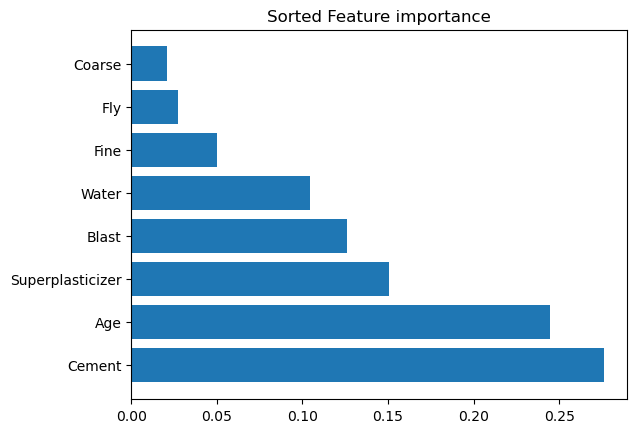

In [15]:
best_model = gcv.best_estimator_
imps = best_model.feature_importances_

i_sorted = np.argsort(-imps)
n_sorted = x.columns[i_sorted]
imp_sort = imps[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()